# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [35]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import dataframe_image as dfi # To conveinently save DFs to image file

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### 1 Inspect the City Data DataFrame

In [36]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [37]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [38]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [39]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [40]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

### 2 Inspect Ride Data DataFrame

In [41]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [42]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge the DataFrames

In [43]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Print the veiw of DF to an image file
# dfi.export(pyber_data_df.head(), 'analysis/Table1.png')

# Display the data table for preview
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Deliverable 1: Get a Summary DataFrame 

### 1.1 Get the total rides for each city type

In [44]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
Total_Urban_Rides = len(urban_cities_df)
Total_Urban_Rides

1625

In [45]:
# Create the Suburban city DataFrame.
Suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
Total_Suburban_Rides = len(Suburban_cities_df)
Total_Suburban_Rides

625

In [46]:
# Create the Rural city DataFrame.
Rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
Total_Rural_Rides = len(Rural_cities_df)
Total_Rural_Rides

125

In [47]:
# Check Ride Count
Total_Urban_Rides + Total_Suburban_Rides + Total_Rural_Rides

2375

In [48]:
# Single View of Ride Data
Total_Rides_by_Type = pyber_data_df.groupby(["type"]).ride_id.count()
Total_Rides_by_Type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

### 1.2 Get the total drivers for each city type

In [49]:
# Get the average number of drivers for each urban city.
urban_driver_count = int(urban_cities_df.groupby(["city"]).mean()["driver_count"].sum())
urban_driver_count

2405

In [50]:
# Get the average number of drivers for each urban city.
Suburban_driver_count = int(Suburban_cities_df.groupby(["city"]).mean()["driver_count"].sum())
Suburban_driver_count

490

In [51]:
# Get the average number of drivers for each urban city.
Rural_driver_count = int(Rural_cities_df.groupby(["city"]).mean()["driver_count"].sum())
Rural_driver_count

78

In [52]:
# Single View of Driver Data
Total_Drivers_by_Type = city_data_df.groupby(["type"]).driver_count.sum()
Total_Drivers_by_Type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

### 1.3 Get the total amount of fares for each city type

In [53]:
# Get total amount of fares for each city in the urban cities.
urban_total_fares = urban_cities_df.fare.sum()
urban_total_fares

39854.380000000005

In [54]:
# Get total amount of fares for each city in the Suburban cities.
Suburban_total_fares = Suburban_cities_df.fare.sum()
round(Suburban_total_fares.sum(),2)

19356.33

In [55]:
# Get total amount of fares for each city in the Rural cities.
Rural_total_fares = Rural_cities_df.fare.sum()
round(Rural_total_fares.sum(),2)

4327.93

In [56]:
# Single View of Total Fare Data
Total_Fares_by_Type = pyber_data_df.groupby(["type"]).fare.sum()
Total_Fares_by_Type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

###  1.4 Get the average fare per ride for each city type. 

In [57]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_total_fares/Total_Urban_Rides
urban_avg_fare

24.52577230769231

In [58]:
# Get average fare for each city in the urban cities.
Suburban_avg_fare = Suburban_total_fares/Total_Suburban_Rides
Suburban_avg_fare

30.970128000000003

In [59]:
# Get average fare for each city in the urban cities.
Rural_avg_fare = Rural_total_fares/Total_Rural_Rides
Rural_avg_fare

34.623439999999995

In [60]:
# Single View of Average Fare Data
Average_Fares_by_Type = pyber_data_df.groupby(["type"]).fare.mean()
Average_Fares_by_Type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [61]:
# Another method - Single View of Average Fare Data
Average_Fares_by_Types_Check = Total_Fares_by_Type/Total_Rides_by_Type
Average_Fares_by_Types_Check

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

### 1.5 Get the average fare per driver for each city type. 

In [62]:
# Get average fare per driver the urban cities.
urban_avg_fare_per_driver = urban_total_fares/urban_driver_count
urban_avg_fare_per_driver

16.571467775467777

In [63]:
# Get average fare per driver the Suburban cities.
Suburban_avg_fare_per_driver = Suburban_total_fares/Suburban_driver_count
Suburban_avg_fare_per_driver.mean()

39.50271428571429

In [64]:
# Get average fare per driver the Rural cities.
Rural_avg_fare_per_driver = Rural_total_fares/Rural_driver_count
Rural_avg_fare_per_driver.mean()

55.486282051282046

In [65]:
# Single View of Average Fare per Driver Data
Average_Fare_per_Driver = Total_Fares_by_Type/Total_Drivers_by_Type
Average_Fare_per_Driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [66]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df  = pd.DataFrame({
    "Total Rides": Total_Rides_by_Type,
    "Total Drivers": Total_Drivers_by_Type,
    "Total Fares": Total_Fares_by_Type,
    "Average Fare per Ride": Average_Fares_by_Type,
    "Average Fare per Driver": Average_Fare_per_Driver})
pyber_summary_df

Total Rides  Total Drivers  Total Fares  Average Fare per Ride  \
type                                                                       
Rural             125             78      4327.93              34.623440   
Suburban          625            490     19356.33              30.970128   
Urban            1625           2405     39854.38              24.525772   

          Average Fare per Driver  
type                               
Rural                   55.486282  
Suburban                39.502714  
Urban                   16.571468

In [67]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

Total Rides  Total Drivers  Total Fares  Average Fare per Ride  \
Rural             125             78      4327.93              34.623440   
Suburban          625            490     19356.33              30.970128   
Urban            1625           2405     39854.38              24.525772   

          Average Fare per Driver  
Rural                   55.486282  
Suburban                39.502714  
Urban                   16.571468

In [68]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"
                                                            ].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# dfi.export(pyber_summary_df, 'analysis/Table2.png')
pyber_summary_df


Total Rides  Total Drivers Total Fares Average Fare per Ride  \
Rural             125             78   $4,327.93                $34.62   
Suburban          625            490  $19,356.33                $30.97   
Urban            1625           2405  $39,854.38                $24.53   

         Average Fare per Driver  
Rural                     $55.49  
Suburban                  $39.50  
Urban                     $16.57

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [69]:
# 1. Read the merged DataFrame
# dfi.export(pyber_data_df.head(), 'analysis/Table3.png')
# dfi.export(pyber_data_df.tail(), 'analysis/Table4.png')

pyber_data_df

city                 date   fare        ride_id  \
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4             South Jack  2019-03-06 04:28:35  34.58  3908451377344   
...                  ...                  ...    ...            ...   
2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598   
2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352   
2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778   
2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277   
2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298   

      driver_count   type  
0                5  Urban  
1               72  Urban  
2               57  Urban  
3               34  Urban  
4               46  Urban  
...            ...    ...  
2370             6  Rural  
2371             2  Rural  
2372             1  Rural  
2373             4  Rural  
2374             1  Rural  

[2375 rows x 6 columns]

In [60]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_df = pyber_data_df.groupby(["type","date"]).sum()

# dfi.export(sum_of_fares_df.head(), 'analysis/Table5.png')
# dfi.export(sum_of_fares_df.tail(), 'analysis/Table6.png')

sum_of_fares_df

fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4
...                          ...            ...           ...
Urban 2019-05-08 04:20:00  21.99   117997692054            52
      2019-05-08 04:39:49  18.45  1811574736337            11
      2019-05-08 07:29:01  18.55  5682021476085            33
      2019-05-08 11:38:35  19.77  7837163332630             4
      2019-05-08 13:10:18  18.04  5616262558026            58

[2375 rows x 3 columns]

In [62]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df = pyber_data_df.reset_index()

In [63]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_pivot_table = pyber_data_df.pivot(index='date',columns='type',values='fare')
fare_pivot_table.head(10)

type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
2019-01-01 09:45:36  43.69       NaN    NaN
2019-01-01 12:32:48    NaN     25.56    NaN
2019-01-01 14:40:14    NaN       NaN   5.42
2019-01-01 14:42:25    NaN       NaN  12.31
2019-01-01 14:52:06    NaN     31.15    NaN

In [64]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_date_range = fare_pivot_table.loc['2019-01-01':'2019-04-29']
fare_date_range

type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-04-28 14:28:36    NaN       NaN  11.46
2019-04-28 16:29:16    NaN       NaN  36.42
2019-04-28 17:26:52    NaN       NaN  31.43
2019-04-28 17:38:09    NaN     34.87    NaN
2019-04-28 19:35:03    NaN     16.96    NaN

[2196 rows x 3 columns]

In [65]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_date_range.index = pd.to_datetime(fare_date_range.index)

In [66]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_date_range.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [67]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_total_fares = fare_date_range.resample('W').sum()

# dfi.export(weekly_total_fares, 'analysis/Table7.png')

weekly_total_fares

type         Rural  Suburban    Urban
date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94
2019-02-10  115.80    974.34  2162.64
2019-02-17   95.82   1045.50  2235.07
2019-02-24  419.06   1412.74  2466.29
2019-03-03  175.14    858.46  2218.20
2019-03-10  303.94    925.27  2470.93
2019-03-17  163.39    906.20  2044.42
2019-03-24  189.76   1122.20  2368.37
2019-03-31  199.42   1045.06  1942.77
2019-04-07  501.24   1010.73  2356.70
2019-04-14  269.79    784.82  2390.72
2019-04-21  214.14   1149.27  2303.80
2019-04-28  191.85   1357.75  2238.29

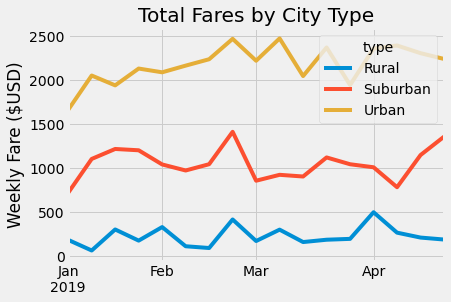

In [191]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_total_fares.plot(xlabel="", ylabel="Weekly Fare ($USD)", title='Total Fares by City Type')
plt.show
plt.savefig(fname='analysis/plot')